In [1]:
import numpy as np
import pandas as pd
import os
import h5py
from scipy import linalg
from scipy.stats import multivariate_normal, chi2, norm, gaussian_kde, boxcox
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import GraphicalLassoCV, LedoitWolf, oas, empirical_covariance, shrunk_covariance, log_likelihood
from sklearn.decomposition import SparsePCA, PCA
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list, optimal_leaf_ordering
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.numpy as jnp
from jax import random

In [6]:
def plot_covariance_and_precision(covs,precs,outfig):

    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(left=0.02, right=0.98)

    # plot the covariances
    vmax = max([covs[i][1].max() for i in range(1,len(covs))])
    for i, (name, this_cov) in enumerate(covs):
        vmax = ( this_cov-np.diag(np.diag(this_cov)) ).max()
        plt.subplot(2, len(covs), i + 1)
        plt.imshow(
            this_cov,
            vmin=-vmax,
            vmax=vmax,
            cmap=plt.cm.RdBu_r,
        )
        plt.xticks(())
        plt.yticks(())
        plt.title("%s covariance" % name)

    # plot the precisions
    vmax = max([precs[i][1].max() for i in range(1,len(precs))])
    for i, (name, this_prec) in enumerate(precs):
        vmax = (this_prec-np.diag(np.diag(this_prec)) ).max()
        ax = plt.subplot(2, len(precs), i + 1 + len(precs))
        plt.imshow(
            np.ma.masked_equal(this_prec, 0),
            vmin=-vmax,
            vmax=vmax,
            cmap=plt.cm.RdBu_r,
        )
        plt.xticks(())
        plt.yticks(())
        plt.title("%s precision" % name)
        if hasattr(ax, "set_facecolor"):
            ax.set_facecolor(".7")
        else:
            ax.set_axis_bgcolor(".7")
    
    #plt.tight_layout()
    plt.savefig(outfig)

def plot_tf_correlation_matrix(X,genome):

    rho = np.corrcoef(X.T)
    for method in ['single','complete','average','weighted','centroid','median','ward']:

        # TF hierarchical clustering based on corr matrix
        triu_idx = np.triu_indices(n_tf,1)
        corr_dist = 1 - rho[triu_idx[0],triu_idx[1]]
        linkage = hierarchy.linkage(corr_dist,optimal_ordering=True,method=method)

        # plot results (exp. corr, exp. loadings, Variance explained per comp)
        fig, axes = plt.subplots(1,2)

        ax = axes[0]
        R = hierarchy.dendrogram(linkage, ax=ax, above_threshold_color='y',orientation='left',labels=None)
        ax.set_yticklabels([])

        # reorder corr matrix
        rho = rho[R['leaves'],:]
        rho = rho[:,R['leaves']]

        ax = axes[1]
        pos = ax.imshow(rho, cmap='RdBu_r', interpolation=None,vmin=-1,vmax=1,origin='lower')
        fig.colorbar(pos, ax=ax, shrink=0.5,location='top')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel('TF')
        ax.set_ylabel('TF')

        fig.set_size_inches([14,12])
        plt.tight_layout()
        fig.savefig(f'results/fig/{genome}/correlation_tf_Chip_{method}.pdf')
        plt.close(fig)


def FA_L1(X, num_factors, sparsity_scale=0.03):
    
    n_gene, n_tf = X.shape
    
    tf = numpyro.sample('tf', dist.Laplace(jnp.zeros((num_factors, n_tf)),sparsity_scale))
    
    gene = numpyro.sample('gene', dist.Laplace(jnp.zeros((num_factors, n_gene)),sparsity_scale))
    
    # Likelihood
    numpyro.sample('obs', dist.Normal(jnp.matmul(gene.T, tf), 1), obs=X)

NameError: name 'P' is not defined

0.6820388407319551
Genes_model_2_BICW_gt_0.8_phase_0_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_2_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_4_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_6_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_8_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_10_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_12_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_14_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_16_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.4
	0.5
	0.6
	0.7
	0.8
	0.9
No TFs
Genes_model_2_BICW_gt_0.8_phase_18_pm_2
	0.0
	0.0
	0.1
	0.2
	0.3
	0.

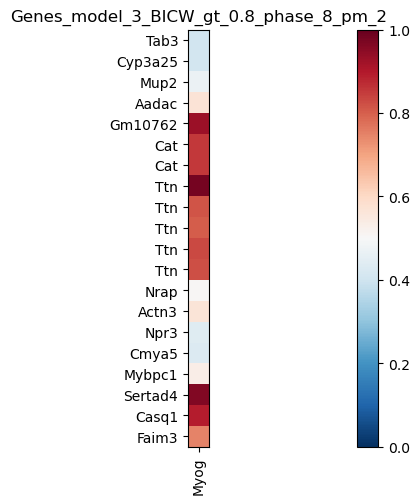

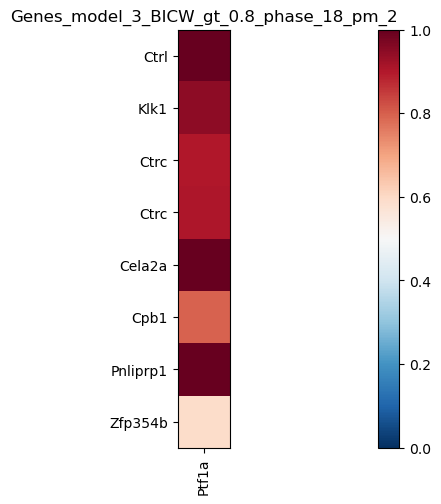

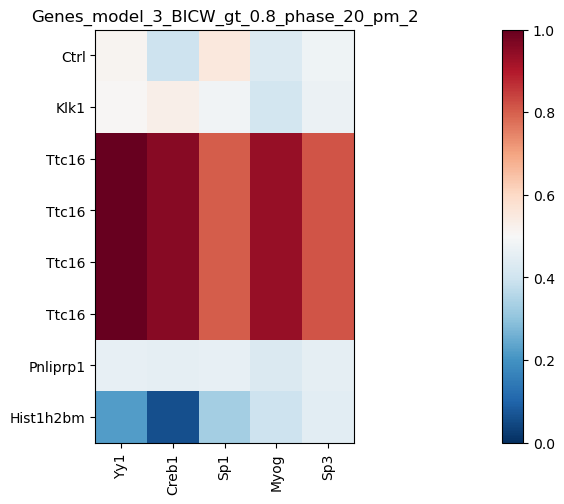

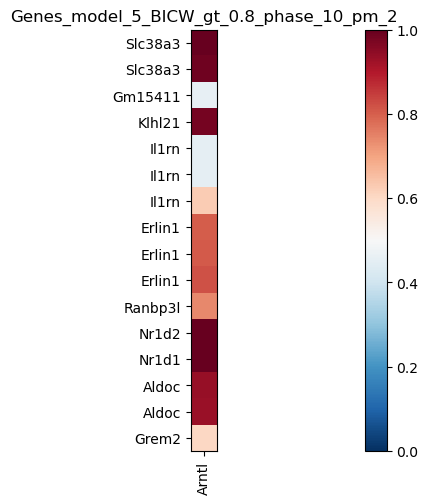

In [57]:
genome = 'mm10'
#genome = 'hg38'
window = '2'
N_bin = 1

# get promoterome
infile_promoterome=f'/home/jbreda/Promoterome/results/{genome}/promoterome_pm{window}kb_filtered.bed'
promoterome = pd.read_csv(infile_promoterome,sep='\t')

# Get all TFs
infile=f'../resources/experimentList_{genome}_TFs_only_QC_filtered.tab'
experiment_tf = pd.read_csv(infile,sep='\t',usecols=[0,3],index_col=0)
TFs = experiment_tf.antigen.unique()

# get binned chip signal per tf per prom
infile = f'../results/{genome}/tensor_TFsvd1_tf_binnedpos_prom.hdf5'

with h5py.File(infile,'r') as hf:
    X = hf[str(N_bin)][:]
# row: samples (prom_pos)
# cols: feature (tf)
X = X.T
[n_prom, n_tf] = X.shape

#rename TFs based on binning
if N_bin > 1:
    TFs = np.array( [f'{tf}_{p}' for tf in TFs for p in range(N_bin)] )

# box-cox transform
if False:
    pc = 1e-6
    lam = np.zeros(n_tf)
    for i in range(n_tf):
        X[:,i], lam[i] = boxcox(X[:,i]+pc)

# regularize cov. matrix
#pc = 1e-4
#X = np.log(X+pc)
X -= X.mean(axis=0)
#X /= X.std(axis=0)
#outfile = 'results/TF_mean.npy'
#np.save(outfile,mu)

if False:
    plot_tf_correlation_matrix(X,genome)

lw = LedoitWolf(assume_centered=True).fit(X)
lw_cov = lw.covariance_
lw_prec = lw.precision_
print(lw.shrinkage_)

my_cov  = lw_cov
my_prec = lw_prec

Gene_subset = ['aminoacyl_tRNA_synthetase','ribosomal_protein_genes','core_circadian_clock_genes','cytochrome_P450_CYP_superfamily']
Gene_subset = ['cytochrome_P450_CYP_superfamily']
Gene_subset = ['Stat5']
Gene_subset = ['Genes_model_5_BICW_gt_0.5', 'Genes_model_2_BICW_lt_0.5', 'Genes_model_3_BICW_lt_0.5']
th = 0.8
Gene_subset = [f'Genes_model_{m}_BICW_gt_{th}_phase_{p}_pm_2' for m in [2,3,5] for p in np.arange(0,24,2)]

# 1D conditional multivariate gaussian
for gene_subset in Gene_subset:
    print(gene_subset)
    
    genes = pd.read_csv(f'../resources/Gene_subsets/{gene_subset}.txt',sep='\t')
    
    gene_idx = np.array([]).astype(int)
    for g in genes[genome].values:
        gene_idx = np.concatenate([gene_idx,promoterome[promoterome.gene == g].index.values])

    gene_idx = np.unique(gene_idx)
    n_gene = len(gene_idx)
    rnd_idx = np.random.randint(0,promoterome.shape[0],n_gene)
    
    P={}
    P['cond'] = np.zeros([n_gene,n_tf])
    P['cond_rnd'] = np.zeros([n_gene,n_tf])
    P['marg'] = np.zeros([n_gene,n_tf])
    P['marg_rnd'] = np.zeros([n_gene,n_tf])

    idx_tf = np.arange(n_tf)
    for j in idx_tf:
        if j % int(n_tf/10)==0:
            print(f'\t{int(10*j/n_tf)/10}')

        idx_1 = np.array([j])
        idx_2 = idx_tf [ idx_tf != idx_1 ]

        S_11 = my_cov[idx_1,idx_1]
        #S_12 = my_cov[np.ix_(idx_1,idx_2)]
        #S_21 = my_cov[np.ix_(idx_2,idx_1)]
        #S_22_inv = linalg.inv( my_cov[np.ix_(idx_2,idx_2)] )
        #S_cond = S_11 - S_12 @ S_22_inv @ S_21
        L_11_inv = 1/my_prec[np.ix_(idx_1,idx_1)]
        L_12 = my_prec[np.ix_(idx_1,idx_2)]
        S_cond = L_11_inv
    
        x_1 = X[np.ix_(gene_idx,idx_1)]
        x_2 = X[np.ix_(gene_idx,idx_2)]

        # mu_cond = mu_1 + S_12 @ S_22_inv @ (x_2 - mu_2) with mu_1 = mu_2 = 0 :
        # mu_cond =  S_12 @ S_22_inv @ x_2.T
        # mu_cond = mu_1 - L_11_inv @ L_12 @ (x_2 - mu_2) with mu_1 = mu_2 = 0 :
        mu_cond = - L_11_inv @ L_12 @ x_2.T

        for i,x_g1 in enumerate(x_1):
            P['cond'][i,j] = multivariate_normal.cdf(x_g1, mean=mu_cond[0,i], cov=S_cond)
            P['marg'][i,j] = multivariate_normal.cdf(x_g1,mean=0,cov=S_11)

        x_rnd_1 = X[np.ix_(rnd_idx,idx_1)]
        x_rnd_2 = X[np.ix_(rnd_idx,idx_2)]
        #mu_cond = S_12 @ S_22_inv @ x_rnd_2.T
        mu_cond = - L_11_inv @ L_12 @ x_rnd_2.T

        for i,x_g1 in enumerate(x_rnd_1):
            P['cond_rnd'][i,j] = multivariate_normal.cdf(x_g1, mean=mu_cond[0,i], cov=S_cond)
            P['marg_rnd'][i,j] = multivariate_normal.cdf(x_g1,mean=0,cov=S_11)

    idx_tf = np.where(np.sum(P['cond'] > 0.8,0)>=n_gene/2)[0]
    if len(idx_tf) == 0:
        print('No TFs')
        continue
    my_genes = promoterome.loc[gene_idx,'gene'].values

    figure, axes = plt.subplots(1,1,figsize=(30,5))
    ax = axes
    h = ax.imshow(P['cond'][:,idx_tf],cmap='RdBu_r',vmin=0,vmax=1,origin='lower',interpolation='none')
    ax.set_xticks(np.arange(len(idx_tf)),TFs[idx_tf],rotation=90)
    ax.set_yticks(np.arange(n_gene),my_genes)
    plt.colorbar(h)
    plt.tight_layout()
    ax.set_title(gene_subset)

    

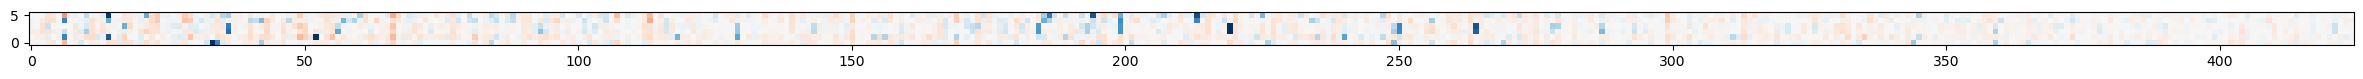

In [10]:
figure, axes = plt.subplots(1,1,figsize=(30,5))
ax = axes
ax.imshow(P['cond'],cmap='RdBu',vmin=0,vmax=1,origin='lower',interpolation='none')

#ax = axes[1]
#ax.imshow(np.matmul(gene.T, tf),cmap='RdBu',origin='lower',interpolation='none')

In [42]:
genes

,mm10
0,Mmp9
1,Lhx2
2,Ms4a7
3,Slc4a1


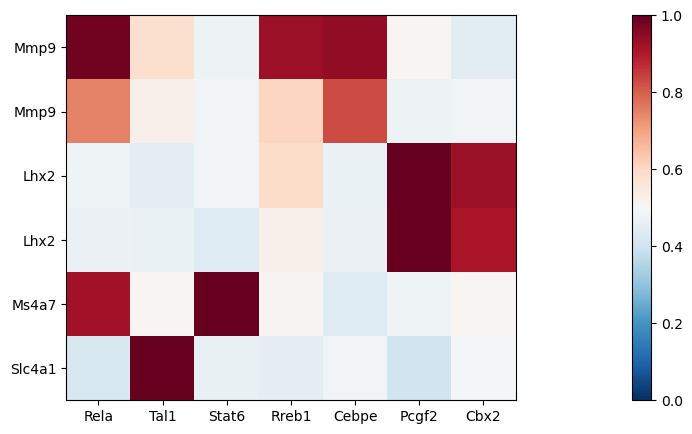

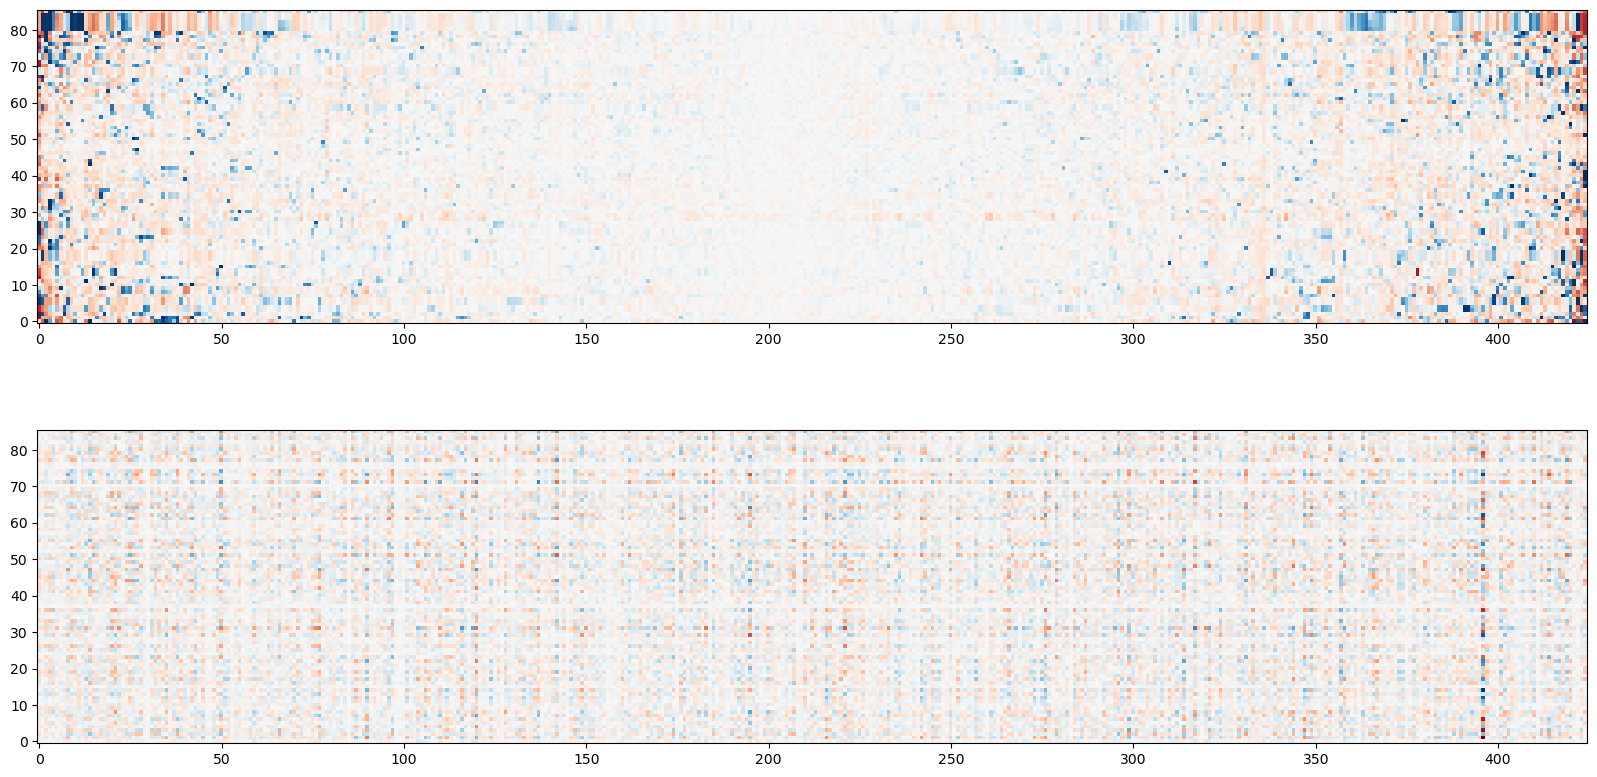

In [20]:
# reodering
Z = linkage(P['cond'], 'average', 'euclidean',optimal_ordering=True)
idx_rows = leaves_list(optimal_leaf_ordering(Z, P['cond']))
Z = linkage(P['cond'].T, 'average', 'euclidean',optimal_ordering=True)
idx_cols = leaves_list(optimal_leaf_ordering(Z, P['cond'].T))

P_reorder = P['cond'][idx_rows,:]
P_reorder = P_reorder[:,idx_cols]

figure, axes = plt.subplots(2,1,figsize=(20,10))

ax = axes[0]
ax.imshow(P_reorder,cmap='RdBu',vmin=0,vmax=1,origin='lower',interpolation='none')

ax = axes[1]
ax.imshow(np.matmul(gene.T, tf),cmap='RdBu',origin='lower',interpolation='none')

In [34]:
genes.mm10[idx_g].values

array(['Pclo', 'AC136746.1', 'Med6', 'Srxn1', 'Zfp738', 'Zfp873',
       'Tmem188', 'Cep55', 'Vps53', 'Tada2a', 'Bcat2', 'Zfp868', 'Setbp1',
       'Zfand1', '1810043H04Rik', 'Trit1', 'Psma4', 'Pltp', 'B4galt2',
       'SCARNA17', 'AC126026.1', '1700009P17Rik', '8430429K09Rik',
       'Mir140', 'D2hgdh', 'Gm20522', 'Pcsk9', 'Fndc5', 'H2-T22',
       'Sharpin', 'Cecr2', 'Slc6a7', 'Yif1b', 'Ldlrad3', 'Snhg12',
       'Plekhf1', 'Clta', 'Oaf', 'Taf8', 'A930039A15Rik', 'Mtrr', 'Snw1',
       'Art4', 'Bcl7b', 'Rhebl1', 'Gm17084', 'Bmper', 'Trip10', 'Atp13a1',
       'Pgp', 'Twf1', 'Gyk', 'Opa3', 'Fam168a', 'Grlf1', 'Taf2', 'Lins',
       'Bbs5', 'Ggnbp1', 'U2', 'Gm10420', 'Lgals2', '4732418C07Rik'],
      dtype=object)

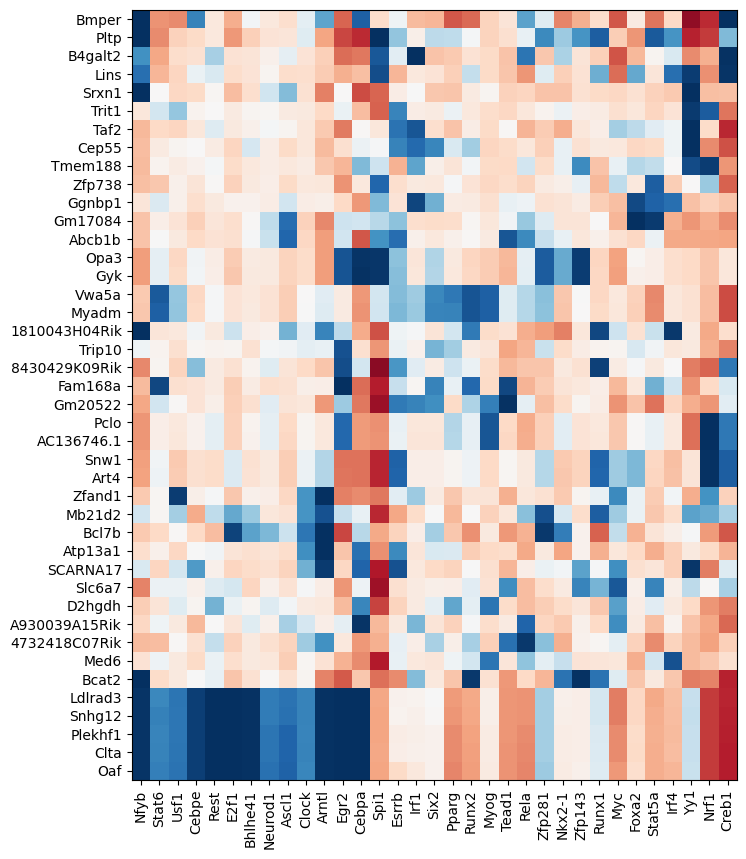

In [48]:
idx_tf = np.where( np.sum(P['cond'] > 0.8,axis=0)>4 )[0]
idx_g = np.where( np.sum(P['cond'] > 0.8,axis=1)>4 )[0]
#idx_g = np.unique(idx_g)
#idx_tf = np.unique(idx_tf)

P_top = P['cond'][idx_g,:]
P_top = P_top[:,idx_tf]
TFs_top = TFs[idx_tf]
genes_top = genes.mm10[idx_g].values

# reodering
Z = linkage(P_top, 'ward', 'euclidean',optimal_ordering=True)
idx_rows = leaves_list(optimal_leaf_ordering(Z, P_top))
Z = linkage(P_top.T, 'ward', 'euclidean',optimal_ordering=True)
idx_cols = leaves_list(optimal_leaf_ordering(Z, P_top.T))

P_top = P_top[idx_rows,:]
P_top = P_top[:,idx_cols]
TFs_top = TFs_top[idx_cols]
genes_top = genes_top[idx_rows]

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(P_top,cmap='RdBu',vmin=0,vmax=1,origin='lower',interpolation='none');
ax.set_xticks(np.arange(P_top.shape[1]),TFs_top,rotation=90);
ax.set_yticks(np.arange(P_top.shape[0]),genes_top);

In [37]:
idx_tf

(array([  6,  21,  63,  67, 113, 143, 180, 181, 184, 244]),)